In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
os.chdir(r"C:\Users\KESHAV\Desktop\pgpda\Python\linear regression")

In [3]:
os.listdir()

['house_price.csv', 'LoansData.csv']

In [4]:
hp=pd.read_csv("house_price.csv")

In [5]:
hp.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
hp.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
hp["Street"].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [9]:
hp["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

<AxesSubplot:>

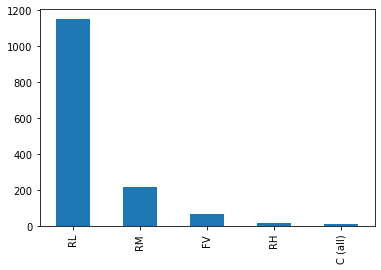

In [10]:
hp["MSZoning"].value_counts().plot(kind="bar")

In [11]:
hp["GarageCond"].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

<AxesSubplot:>

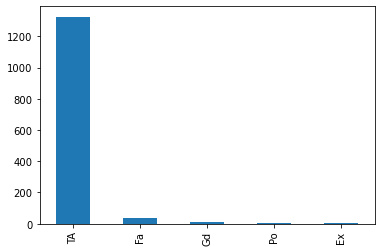

In [12]:
hp["GarageCond"].value_counts().plot(kind="bar")

In [13]:
hp["GarageQual"].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

<AxesSubplot:>

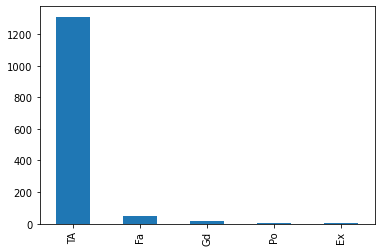

In [14]:
hp["GarageQual"].value_counts().plot(kind="bar")                                                                                                                            

In [20]:
hp[["SalePrice","YearBuilt"]].corr()

,SalePrice,YearBuilt
SalePrice,1.000000,0.522897
YearBuilt,0.522897,1.000000


In [21]:
hp.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

In [24]:
hp["PoolQC"].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [25]:
hp["MiscFeature"].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [26]:
hp["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

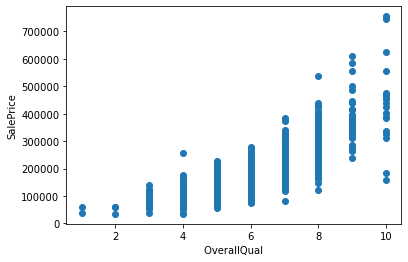

In [29]:
plt.scatter(hp["OverallQual"],hp["SalePrice"])
plt.xlabel(" OverallQual ")
plt.ylabel("SalePrice")
plt.show()

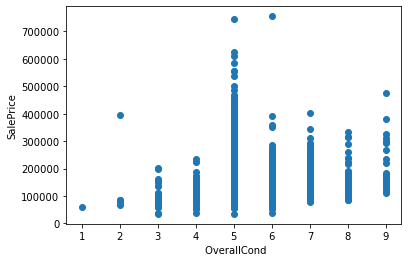

In [30]:
plt.scatter(hp["OverallCond"],hp["SalePrice"])
plt.xlabel(" OverallCond")
plt.ylabel("SalePrice")
plt.show()

In [31]:
hp[["OverallCond","SalePrice"]].corr()

,OverallCond,SalePrice
OverallCond,1.000000,-0.077856
SalePrice,-0.077856,1.000000


In [32]:
hp[["OverallQual","SalePrice"]].corr()

,OverallQual,SalePrice
OverallQual,1.000000,0.790982
SalePrice,0.790982,1.000000


In [35]:
hp["PoolQC"]=np.where(hp["PoolQC"]=="Yes",1,0)


In [38]:
hp["Has_Fireplaces"] = hp["Fireplaces"].replace([1,2,3],value=1)


In [39]:
house["PoolQC"]=house["PoolQC"].replace(["Gd","Fa","Ex"],value = 1)


NameError: name 'house' is not defined

In [40]:
house["PoolQC"]=house["PoolQC"].replace(["Gd","Fa","Ex"],value = 1)


NameError: name 'house' is not defined

In [41]:
house["PoolQC"].fillna(value = 0,inplace = True)


NameError: name 'house' is not defined

In [42]:
house4["MasVnrArea"].fillna(value = house4["MasVnrArea"].median(),inplace=True)


NameError: name 'house4' is not defined

In [43]:
house4.describe(percentiles = [.01,.02,.03,.04,.05,.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95,.96,.97,.98,.99,1])


NameError: name 'house4' is not defined